In [8]:
import imageio
import gymnasium as gym
import numpy as np
import gym_aloha
import numpy
import matplotlib.pyplot as plt



In [9]:
env = gym.make("gym_aloha/AlohaTransferCube-v0",obs_type="pixels_agent_pos")
observation, info = env.reset()

In [10]:
observation['pixels']['top'].shape

(480, 640, 3)

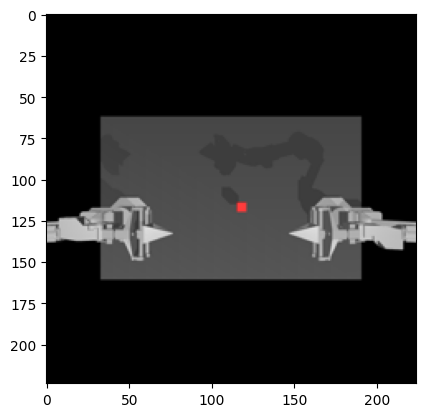

(3, 224, 224)

In [11]:
# Approach 1
from PIL import Image
import numpy as np

frames = []
image = Image.fromarray(observation['pixels']['top'])
original_width, original_height = image.size
new_height = 640
padding_top = 80
new_image = Image.new("RGB", (original_width, new_height), (0, 0, 0))

new_image.paste(image, (0, padding_top))
new_image_resized = new_image.resize((224, 224))
new_image_resized_frame = np.array(new_image_resized.getdata())
new_image_resized_frame_i = new_image_resized_frame.reshape((224, 224, 3)).astype(np.uint8)
plt.imshow(new_image_resized_frame_i)
plt.show()
new_image_resized_frame_i_t = new_image_resized_frame_i.transpose(2, 1, 0)
new_image_resized_frame_i_t_a  = np.array(new_image_resized_frame_i_t, dtype='uint8')
new_image_resized_frame_i_t_a.shape

In [13]:
original_shape = image_data.shape
original_shape

(480, 640, 3)

In [14]:
image = Image.fromarray(image_data)
cur_width, cur_height = image.size
cur_width, cur_height

(640, 480)

In [15]:
width = height = 224
ratio = max(cur_width / width, cur_height / height)
ratio

2.857142857142857

In [16]:
resized_height = int(cur_height / ratio)
resized_width = int(cur_width / ratio)
resized_width, resized_height

(224, 168)

In [17]:
resized_image = image.resize((resized_width, resized_height), resample=Image.BILINEAR)
resized_image.mode

'RGB'

In [18]:
zero_image = Image.new(resized_image.mode, (width, height), 0)

In [19]:
pad_height = max(0, int((height - resized_height) / 2))
pad_width = max(0, int((width - resized_width) / 2))
pad_width, pad_height

(0, 28)

In [22]:
zero_image.paste(resized_image, (pad_width, pad_height))

In [23]:
resized = np.array(zero_image)

In [27]:
xx = resized.reshape(*original_shape[:-3], *resized.shape[-3:])
yy = resized.reshape((224, 224, 3))

In [28]:
xx.shape, yy.shape

((224, 224, 3), (224, 224, 3))

In [30]:
yy.transpose(2, 0, 1).shape, yy.transpose(2, 1, 0).shape

((3, 224, 224), (3, 224, 224))

In [7]:
# Approach 2
image_data = observation['pixels']['top']
print(image_data.shape)
new_image_data = convert_to_uint8(resize_with_pad(image_data, 224, 224))
print(new_image_data.shape)
plt.imshow(new_image_data)
plt.show()
new_image_data_t = np.transpose(new_image_data, (2, 0, 1))
print(new_image_data_t.shape)


(480, 640, 3)


NameError: name 'convert_to_uint8' is not defined

In [12]:
im1 = Image.fromarray(new_image_resized_frame_i)
im1.save("my.png")
im2 = Image.fromarray(new_image_data)
im2.save("their.png")


In [15]:
(new_image_resized_frame_i == new_image_data).all()

np.False_

In [ ]:
# save observation to file -- my.png

(50176, 3)


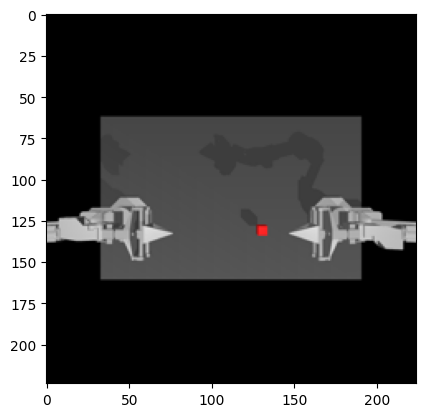

(3, 224, 224)

In [6]:
# Approach 1 from file, as we are sending png over the network
image = Image.open("my.png") 
original_width, original_height = image.size
new_height = 640
padding_top = 80
new_image = Image.new("RGB", (original_width, new_height), (0, 0, 0))

new_image.paste(image, (0, padding_top))
new_image_resized = new_image.resize((224, 224))
new_image_resized_frame = np.array(new_image_resized.getdata())
print(new_image_resized_frame.shape)
new_image_resized_frame_i = new_image_resized_frame.reshape((224, 224, 3))
plt.imshow(new_image_resized_frame_i)
plt.show()
new_image_resized_frame_i_t = new_image_resized_frame_i.transpose(2, 1, 0)
new_image_resized_frame_i_t_a  = np.array(new_image_resized_frame_i_t, dtype='uint8')
new_image_resized_frame_i_t_a.shape

(480, 640, 3)
(224, 224, 3)


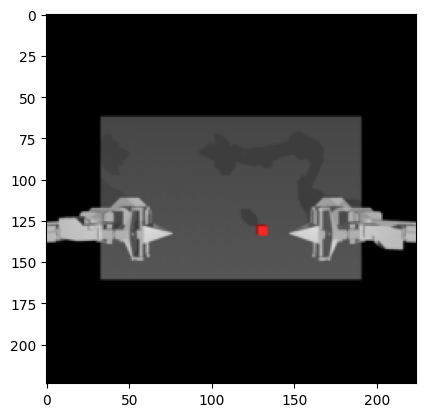

(3, 224, 224)


In [17]:
# Approach 2
image = Image.open("my.png").convert('RGB')
image_data_i = np.array(image)
print(image_data_i.shape)
new_image_data = convert_to_uint8(resize_with_pad(image_data_i, 224, 224))
print(new_image_data.shape)
plt.imshow(new_image_data)
plt.show()
new_image_data_t = np.transpose(new_image_data, (2, 0, 1))
print(new_image_data_t.shape)


In [19]:
(new_image_data == new_image_resized_frame_i).all()

np.False_

In [12]:
import numpy as np
from PIL import Image


def convert_to_uint8(img: np.ndarray) -> np.ndarray:
    """Converts an image to uint8 if it is a float image.

    This is important for reducing the size of the image when sending it over the network.
    """
    if np.issubdtype(img.dtype, np.floating):
        img = (255 * img).astype(np.uint8)
    return img


def resize_with_pad(images: np.ndarray, height: int, width: int, method=Image.BILINEAR) -> np.ndarray:
    """Replicates tf.image.resize_with_pad for multiple images using PIL. Resizes a batch of images to a target height.

    Args:
        images: A batch of images in [..., height, width, channel] format.
        height: The target height of the image.
        width: The target width of the image.
        method: The interpolation method to use. Default is bilinear.

    Returns:
        The resized images in [..., height, width, channel].
    """
    # If the images are already the correct size, return them as is.
    if images.shape[-3:-1] == (height, width):
        return images

    original_shape = images.shape

    images = images.reshape(-1, *original_shape[-3:])
    resized = np.stack([_resize_with_pad_pil(Image.fromarray(im), height, width, method=method) for im in images])
    return resized.reshape(*original_shape[:-3], *resized.shape[-3:])


def _resize_with_pad_pil(image: Image.Image, height: int, width: int, method: int) -> Image.Image:
    """Replicates tf.image.resize_with_pad for one image using PIL. Resizes an image to a target height and
    width without distortion by padding with zeros.

    Unlike the jax version, note that PIL uses [width, height, channel] ordering instead of [batch, h, w, c].
    """
    cur_width, cur_height = image.size
    if cur_width == width and cur_height == height:
        return image  # No need to resize if the image is already the correct size.

    ratio = max(cur_width / width, cur_height / height)
    resized_height = int(cur_height / ratio)
    resized_width = int(cur_width / ratio)
    resized_image = image.resize((resized_width, resized_height), resample=method)

    zero_image = Image.new(resized_image.mode, (width, height), 0)
    pad_height = max(0, int((height - resized_height) / 2))
    pad_width = max(0, int((width - resized_width) / 2))
    zero_image.paste(resized_image, (pad_width, pad_height))
    assert zero_image.size == (width, height)
    return zero_image




In [7]:
import imageio
import gymnasium as gym
import numpy as np
import gym_aloha
import numpy
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import requests
import uuid
import time

In [8]:
env = gym.make("gym_aloha/AlohaTransferCube-v0",obs_type="pixels_agent_pos",max_episode_steps=1000,render_mode='rgb_array')


In [10]:
episode_counter = 18
observation, info = env.reset()
frames = []
url = "http://35.154.119.244:5000/file"
do_continue = True
action_counter = 0
request_counter = 0
step_time = 1/50
last_step_time = time.time()

for _ in range(1000):
    frame = observation['pixels']['top']
    state_data = observation['agent_pos'].tolist()
    frames.append(frame)
    im = Image.fromarray(frame)
    image_path = '/home/absin/Documents/images/episode_'+str(episode_counter)+'_'+str(request_counter)+'_'+str(uuid.uuid4())+'.png'
    im.save(image_path)
    with open(image_path, 'rb') as file:
        files = {'file': file}
        #data = {'state': str(state_data), 'prompt': 'transfer the cube from right hand to left hand'}
        data = {'state': str(state_data), 'prompt': 'pick the cube with right hand'}
        #data = {'state': str(state_data)}
        response = requests.post(url, files=files, data=data)
        request_counter = request_counter+1
        print('Asking for more actions')
    for action_arr in response.json()['body']:
        action_ = np.array(action_arr, dtype='float32')
        observation, reward, terminated, truncated, info = env.step(action_)
        action_counter = action_counter + 1
        frame = observation['pixels']['top']
        frames.append(frame)
        if terminated or truncated:
            print('Reward -- {}'.format(reward))
            do_continue = False
            break
        #"""
        now = time.time()
        dt = now - last_step_time
        if dt < step_time:
            time.sleep(step_time - dt)
            last_step_time = time.time()
        else:
            last_step_time = now
        #"""
    
    if not do_continue:
        break
env.close()
imageio.mimsave("/home/absin/Documents/images/episode_{}.mp4".format(episode_counter), np.stack(frames), fps=25)

Asking for more actions
Asking for more actions
Asking for more actions
Asking for more actions
Asking for more actions
Asking for more actions
Reward -- 4


In [9]:
imageio.mimsave("/home/absin/Documents/images/episode_{}.mp4".format(episode_counter), np.stack(frames), fps=25)

In [ ]:
image = Image.open("my.png").convert('RGB')
image_data_i = np.array(image)
print(image_data_i.shape)
new_image_data = convert_to_uint8(resize_with_pad(image_data_i, 224, 224))
print(new_image_data.shape)
plt.imshow(new_image_data)
plt.show()
new_image_data_t = np.transpose(new_image_data, (2, 0, 1))
print(new_image_data_t.shape)